# Tutorial Exercise: Yelp reviews

## Introduction

This exercise uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- **`yelp.csv`** contains the dataset. It is stored in the repository (in the **`data`** directory), so there is no need to download anything from the Kaggle website.
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review.

**Goal:** Predict the star rating of a review using **only** the review text.

**Tip:** After each task, I recommend that you check the shape and the contents of your objects, to confirm that they match your expectations.

## Task 1

Read **`yelp.csv`** into a pandas DataFrame and examine it.

In [8]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/yelp.csv"
yelp = pd.read_csv(url)
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


## Task 2

Create a new DataFrame that only contains the **5-star** and **1-star** reviews.

- **Hint:** [How do I apply multiple filter criteria to a pandas DataFrame?](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb#9.-How-do-I-apply-multiple-filter-criteria-to-a-pandas-DataFrame%3F-%28video%29) explains how to do this.

In [7]:
extremes = yelp[(yelp['stars'] == 5) | (yelp['stars'] == 1)]
print(extremes['stars'].unique())
print(extremes.shape)

[5 1]
(4086, 10)


## Task 3

Define X and y from the new DataFrame, and then split X and y into training and testing sets, using the **review text** as the only feature and the **star rating** as the response.

- **Hint:** Keep in mind that X should be a pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the task that follows.

In [9]:
X = extremes['text']
y = extremes['stars']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (4086,)
y shape:  (4086,)


## Task 4

Use CountVectorizer to create **document-term matrices** from X_train and X_test.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2737,)
(2737,)
(1349,)
(1349,)


In [12]:
countvect = CountVectorizer()
X_train_dtm = countvect.fit_transform(X_train)
X_test_dtm = countvect.transform(X_test)

In [13]:
X_train_dtm

<2737x15960 sparse matrix of type '<class 'numpy.int64'>'
	with 212590 stored elements in Compressed Sparse Row format>

In [14]:
X_test_dtm

<1349x15960 sparse matrix of type '<class 'numpy.int64'>'
	with 101033 stored elements in Compressed Sparse Row format>

## Task 5

Use multinomial Naive Bayes to **predict the star rating** for the reviews in the testing set, and then **calculate the accuracy** and **print the confusion matrix**.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to interpret both classification accuracy and the confusion matrix.

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
pred = nb.predict(X_test_dtm)
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  0.911045218680504


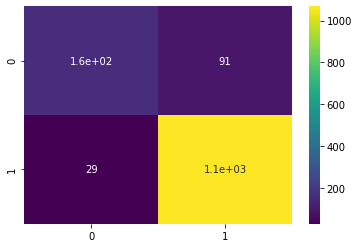

In [37]:
confmat = confusion_matrix(y_test, pred)
sns.heatmap(confmat, cmap='viridis', annot=True);

In [38]:
print(confmat)

[[ 161   91]
 [  29 1068]]


## Task 6 (Challenge)

Calculate the **null accuracy**, which is the classification accuracy that could be achieved by always predicting the most frequent class.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains null accuracy and demonstrates two ways to calculate it, though only one of those ways will work in this case. Alternatively, you can come up with your own method to calculate null accuracy!

In [41]:
import numpy as np

In [39]:
y_train.value_counts()

5    2240
1     497
Name: stars, dtype: int64

In [43]:
most_common = 5
null_acc = np.mean(y_test == most_common)
print("Null accuracy: ", null_acc)

Null accuracy:  0.8131949592290586


## Task 7 (Challenge)

Browse through the review text of some of the **false positives** and **false negatives**. Based on your knowledge of how Naive Bayes works, do you have any ideas about why the model is incorrectly classifying these reviews?

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains the definitions of "false positives" and "false negatives".
- **Hint:** Think about what a false positive means in this context, and what a false negative means in this context. What has scikit-learn defined as the "positive class"?

In [55]:
pred_v_act = pd.DataFrame({"act":y_test, "pred":pred})
false_negatives = pred_v_act[(pred_v_act['act'] == 5) & (pred_v_act['pred'] == 1)]
false_positives = pred_v_act[(pred_v_act['act'] == 1) & (pred_v_act['pred'] == 5)]

In [60]:
yelp.loc[false_positives.index[2], 'text']

"I'm sorry to be what seems to be the lone one star review.  Either I got there on the worst day in their history, or everyone drank the Koolaid, or I just have different expectations and taste buds.\nIt seems like a great idea.  It's a build your own burger joint, $7.00 gets you a cooked to order burger with one cheese, up to 4 toppings, and 2 sauces with fries or onion rings-or some other choices.  They also claim that the beef is local, hormone free, etcetera....\n\nI chose a rare burger with American, grilled onions, sauteed mushrooms. tomato and lettuce, with mayo and mustard on a potato bun.  I added bacon for a dollar.\n\nFirst, let me point out that if you are in a hurry, DON'T GO HERE TO EAT.  I waited exactly 39 minutes for my food. This would not be a big deal if:\n1.  I had been warned before they ran my credit card--what if I only had 30 minutes for lunch??\n2. They had places to sit but it's tiny and full.\n3.  They had magazines, a jukebox, ANYTHING to entertain you for 

The bag-of-words model cannot understand syntactic clues such as negation or emotional cues such as sarcasm.

## Task 8 (Challenge)

Calculate which 10 tokens are the most predictive of **5-star reviews**, and which 10 tokens are the most predictive of **1-star reviews**.

- **Hint:** Naive Bayes automatically counts the number of times each token appears in each class, as well as the number of observations in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object.

In [72]:
tokens = countvect.get_feature_names()
neg_tokens = nb.feature_count_[0]
pos_tokens = nb.feature_count_[1]

token_count = pd.DataFrame({'token':tokens, 'one_star':neg_tokens, 'five_star':pos_tokens})
token_count.head()

,token,one_star,five_star
0,00,26.0,36.0
1,000,4.0,5.0
2,00am,2.0,2.0
3,00pm,0.0,4.0
4,01,1.0,2.0


In [98]:
token_count['pos_prob'] = token_count.five_star / (token_count.one_star + token_count.five_star)
token_count['neg_prob'] = token_count.one_star / (token_count.one_star + token_count.five_star)
token_count['pos_ratio'] = token_count.five_star / token_count.one_star

topneg = token_count.sort_values('neg_prob', ascending=False)
print("The top 2075 tokens of topneg occur ONLY in negative reviews")
topneg.reset_index().head(2076)

The top 2075 tokens of topneg occur ONLY in negative reviews


,index,token,one_star,five_star,pos_prob,neg_prob,pos_ratio
0,13990,talisha,1.0,0.0,0.000000,1.000000,0.000000
1,13548,stored,1.0,0.0,0.000000,1.000000,0.000000
2,7109,idiotic,1.0,0.0,0.000000,1.000000,0.000000
3,7105,identified,1.0,0.0,0.000000,1.000000,0.000000
4,1745,blunt,1.0,0.0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...
2071,4022,dennys,1.0,0.0,0.000000,1.000000,0.000000
2072,11110,pube,1.0,0.0,0.000000,1.000000,0.000000
2073,7998,laps,1.0,0.0,0.000000,1.000000,0.000000
2074,8088,lease,1.0,0.0,0.000000,1.000000,0.000000


In [115]:
toppos = token_count.sort_values('pos_prob', ascending=False)
print("The top 8938 tokens of toppos occur ONLY in positive reviews")
toppos.reset_index().head(8938)

The top 8938 tokens of toppos occur ONLY in positive reviews


,index,token,one_star,five_star,pos_prob,neg_prob,pos_ratio
0,7980,lamps,0.0,4.0,1.000000,0.000000,inf
1,9011,miniature,0.0,1.0,1.000000,0.000000,inf
2,9014,minimalistic,0.0,1.0,1.000000,0.000000,inf
3,9016,minimize,0.0,1.0,1.000000,0.000000,inf
4,9017,minimized,0.0,1.0,1.000000,0.000000,inf
...,...,...,...,...,...,...,...
8933,652,alofts,0.0,2.0,1.000000,0.000000,inf
8934,1149,author,0.0,1.0,1.000000,0.000000,inf
8935,4970,escolar,0.0,1.0,1.000000,0.000000,inf
8936,653,aloha,0.0,3.0,1.000000,0.000000,inf


## Task 9 (Challenge)

Up to this point, we have framed this as a **binary classification problem** by only considering the 5-star and 1-star reviews. Now, let's repeat the model building process using all reviews, which makes this a **5-class classification problem**.

Here are the steps:

- Define X and y using the original DataFrame. (y should contain 5 different classes.)
- Split X and y into training and testing sets.
- Create document-term matrices using CountVectorizer.
- Calculate the testing accuracy of a Multinomial Naive Bayes model.
- Compare the testing accuracy with the null accuracy, and comment on the results.
- Print the confusion matrix, and comment on the results. (This [Stack Overflow answer](http://stackoverflow.com/a/30748053/1636598) explains how to read a multi-class confusion matrix.)
- Print the [classification report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), and comment on the results. If you are unfamiliar with the terminology it uses, research the terms, and then try to figure out how to calculate these metrics manually from the confusion matrix!

In [118]:
X = yelp['text']
y = yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

In [121]:
countvect = CountVectorizer()
X_train_dtm = countvect.fit_transform(X_train)
X_test_dtm = countvect.transform(X_test)

In [124]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
pred = nb.predict(X_test_dtm)
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  0.4812121212121212


In [134]:
most_common = 4
null_acc = np.mean(y_test == most_common)
print("Null accuracy: ", null_acc)

Null accuracy:  0.3612121212121212


The Multinomial Naive Bayes model does better than the null accuracy, but the accuracy is not great. This is probably because it is a multiclass problem, making accuracy much more difficult.

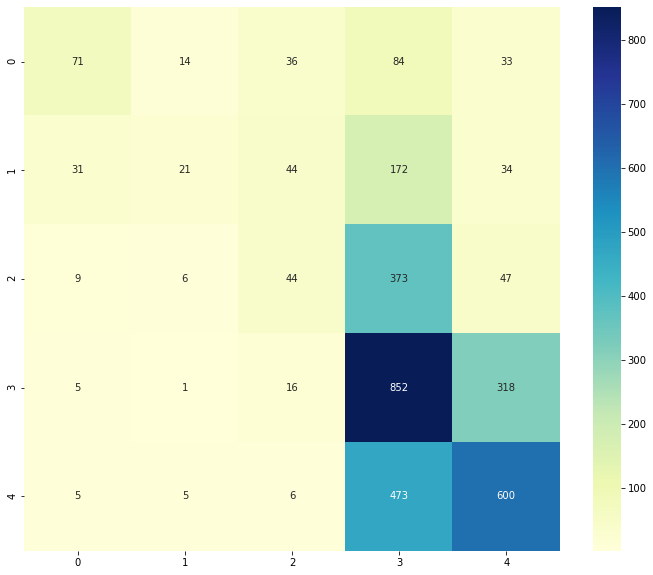

In [143]:
confmat = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,10))
sns.heatmap(confmat, cmap='YlGnBu', annot=True, fmt='g');

It looks like the model always predicts rather high star-ratings. The only low rating that is the least bit accurate is the 1-star ratings (0 in the confusion matrix). Perhaps it can only understand negativity when it is VERY explicit. This goes back to my thoughts earlier; the bag-of-words method cannot understand sarcasm or negation. "good" is a positive word, but it also appears in the negative phrase "not good". It is also possibly cuased by the imbalanced dataset.

In [145]:
from sklearn.metrics import classification_report

In [148]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           1       0.59      0.30      0.40       238
           2       0.45      0.07      0.12       302
           3       0.30      0.09      0.14       479
           4       0.44      0.71      0.54      1192
           5       0.58      0.55      0.57      1089

    accuracy                           0.48      3300
   macro avg       0.47      0.35      0.35      3300
weighted avg       0.48      0.48      0.44      3300



From the classification report, it looks like the model's inaccuracy is related to the imbalance in the dataset. recall and f1 scores are much better in the larger classes. However, all of the scores calculated, precision, recall, and f1, also show that the model can differentiate 1-star reviews from higher-star reviews more accurately than it can differentiate those 2 or 3 stars; this is evidence that the model cannot deal with sentiment ambiguity, such as negation or sarcasm. A "bag-of-phrases" model, if there is such a thing, ought to work better than a bag-of-words method for this classification problem.